In [1]:
# import required libraries

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# read in the csv and print the first 5 rows

df = pd.read_csv("../Auto.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# horesepower is an object instead of numerical

df["horsepower"] = df["horsepower"].apply(pd.to_numeric, errors="coerce")

In [5]:
# recheck the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [6]:
# noticed there are 5 null rows in horsepower so drop them

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [7]:
# define the predictor and response variables

X = df[["horsepower"]]
y = df["mpg"]

In [8]:
# define the cross validation method to use

cv = KFold(n_splits=10, random_state=17, shuffle=True)

In [9]:
# build regression model

lr = LinearRegression()

In [10]:
# cross validate and get the absolute er
scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

np.mean(np.absolute(scores))

24.182335895569214

In [11]:
# fit transform the X train and test for polynomial regressions (from 1 to 10)

errors = []

for i in range(1, 11):
    poly_2 = PolynomialFeatures(degree=i)
    X_2 = poly_2.fit_transform(X)

    lr_poly_2 = LinearRegression()
    lr_poly_2.fit(X_2, y)

    # cross validate and get the absolute er
    scores = cross_val_score(lr, X_2, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

    error = np.mean(np.absolute(scores))
    errors.append(error)

errors    

[24.182335895569217,
 19.137584705468033,
 19.155247225795396,
 19.250162771384097,
 18.897078843841197,
 18.818390907427926,
 18.948535614136052,
 19.045140433944674,
 18.97444418742977,
 18.80487965314793]

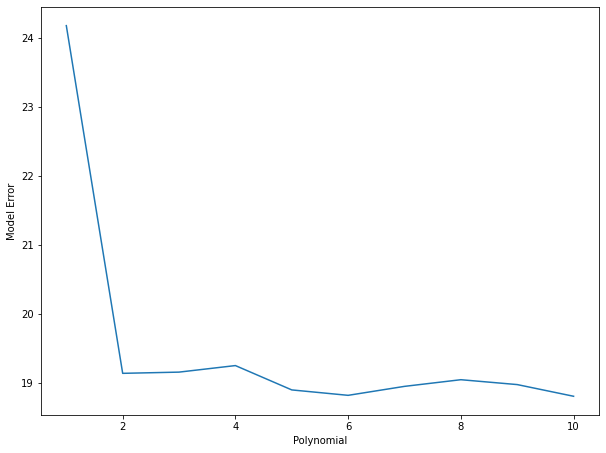

In [12]:
plt.figure(figsize=(10, 7.5))

plt.plot([i for i in range(1, 11)], errors)
plt.xlabel("Polynomial")
plt.ylabel("Model Error")
plt.show()